In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as LinearRegression
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
from pathlib import Path
import pandas as pd

In [6]:
data_path = Path("data/healthcare_data.csv")

In [7]:
df = pd.read_csv(data_path)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17498 entries, 0 to 17497
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      17498 non-null  object 
 1   first_name      17498 non-null  object 
 2   last_name       17498 non-null  object 
 3   age             17498 non-null  int64  
 4   gender          17498 non-null  object 
 5   phone           17498 non-null  object 
 6   email           17498 non-null  object 
 7   department      17498 non-null  object 
 8   diagnosis       17498 non-null  object 
 9   treatment       17498 non-null  object 
 10  admission_date  17498 non-null  object 
 11  discharge_date  17498 non-null  object 
 12  status          17498 non-null  object 
 13  bill_amount     17498 non-null  float64
dtypes: float64(1), int64(1), object(12)
memory usage: 1.9+ MB


In [9]:
df.describe()

,age,bill_amount
count,17498.000000,17498.000000
mean,45.426449,100716.900625
std,25.993349,57619.407262
min,1.000000,2009.660000
25%,23.000000,50677.667500
50%,45.000000,100044.505000
75%,68.000000,151204.307500
max,90.000000,199991.660000


<Axes: xlabel='diagnosis', ylabel='Count'>

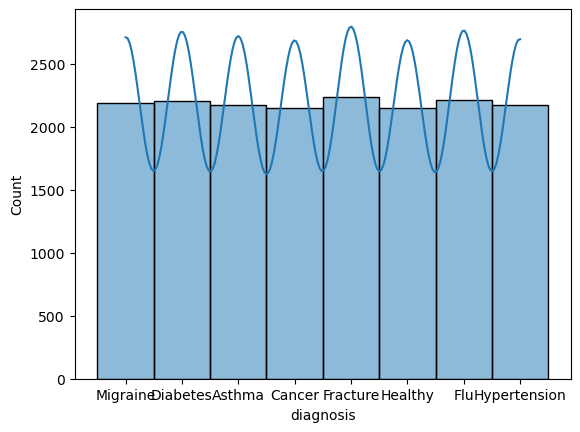

In [10]:
sns.histplot(df["diagnosis"],kde = True)

<Axes: xlabel='diagnosis', ylabel='Count'>

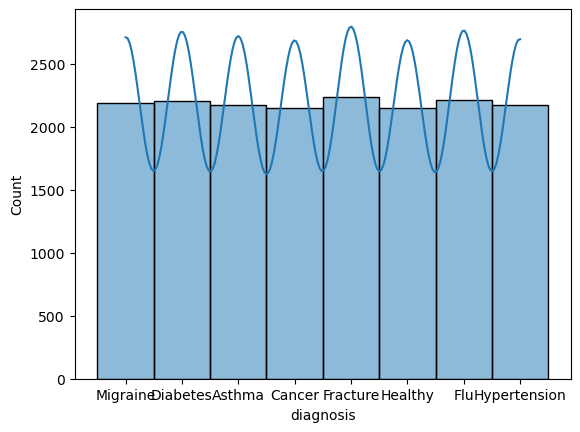

In [12]:
sns.histplot(df["diagnosis"],kde = True)

<Axes: xlabel='gender', ylabel='Count'>

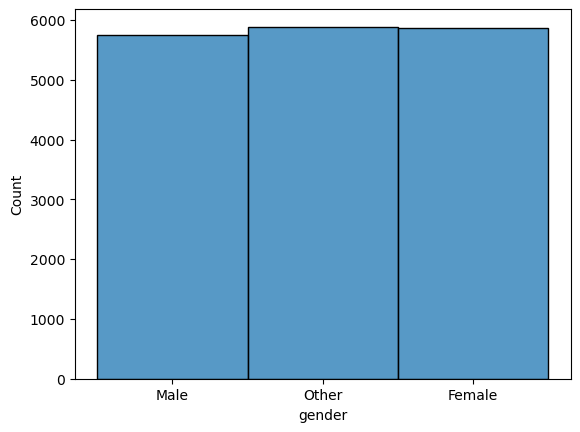

In [17]:
sns.histplot(df["gender"])

In [19]:
df

,patient_id,first_name,last_name,age,gender,phone,email,department,diagnosis,treatment,admission_date,discharge_date,status,bill_amount
0,PID1000,Victor,Hoffman,60,Male,578-267-5326x77210,turnermichelle@example.org,Pediatrics,Migraine,Medication,2024-02-10,2025-06-01,Admitted,100900.97
1,PID1001,John,Sparks,11,Other,(263)977-2102x55652,amandagarner@example.net,Dermatology,Diabetes,Medication,2023-11-18,2025-01-26,Discharged,120905.91
2,PID1002,Isabella,Rubio,2,Female,275.597.9494,james75@example.org,Neurology,Asthma,Medication,2023-12-04,2025-03-02,Under Treatment,170672.18
3,PID1003,Allison,Hill,22,Other,4857130035,salazaralice@example.net,Cardiology,Cancer,Observation,2023-12-25,2024-10-07,Discharged,149977.74
4,PID1004,James,Berry,8,Female,791-362-4064,christinaalexander@example.net,Neurology,Cancer,Observation,2025-02-14,2024-11-15,Under Treatment,160039.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17493,PID18493,Patricia,Bates,31,Male,001-505-697-3292,baldwintiffany@example.com,Pediatrics,Flu,Surgery,2025-06-14,2025-06-04,Under Treatment,140589.34
17494,PID18494,Ethan,Jensen,81,Other,434-983-8764,cummingselizabeth@example.net,Orthopedics,Migraine,Therapy,2024-06-27,2024-11-09,Under Treatment,167515.69
17495,PID18495,Steven,Barrett,59,Female,274-486-1625,mary85@example.org,Neurology,Flu,Medication,2025-08-28,2025-01-22,Discharged,61886.23
17496,PID18496,Nancy,Moss,31,Male,(609)859-0475,hoganshannon@example.org,Neurology,Cancer,Observation,2024-03-17,2025-01-06,Discharged,106990.03


In [22]:
male_diagnosis = df[df['gender'] == 'Male']['age']
female_diagnosis = df[df['gender'] == 'Female']['age']
t_stat, p_value = ttest_ind(male_diagnosis, female_diagnosis)
print("T-Statistic: ", t_stat)
print("P-Value: ", p_value)

alpha = 0.05
if p_value <= alpha:
    print("Rejecet all null hypo: Significant difference")
else:
    print("No Significant")

T-Statistic:  0.3458663779652565
P-Value:  0.7294494043230324
No Significant


In [21]:
male_diagnosis

0        60
9        88
13       60
14       37
16       71
         ..
17481    26
17483    80
17491    24
17493    31
17496    31
Name: age, Length: 5742, dtype: int64